# Lecture 22 - Optimization
 
In [Lecture 21](ME400_Lecture_21.ipynb), the basics of solving nonlinear problems (i.e., "root finding") were covered.  Here, the related problem of minimizing (or maximizing) functions is studied, which allows us to find *optimal* solutions in a variety of applications.   

### Objectives

By the end of this lesson, you should be able to

- Define objective functions and constraints provided sufficient inputs
- Define examples of linear/nonlinear, constrained/unconstrained optimization problems
- Use `scipy.optimize.minimize` to solve a variety of optimization problems of interest

### Key Terms

- objective function
- unconstrained optimization
- constrained optimization
- linear program
- gradient vector
- Hessian matrix
- `scipy.optimize.minimize`

## When Have You *Optimized* Something?

Describe one time when you had to determine an *optmimum* solution for some problem.  This could be a problem from any class or from a real-life situation.  If you can't think of something, describe a hypothetical problem.  In all cases, state (1) the feature or features being optimized  and (2) any constraints that apply. 

## Some Nomenclature

Optimization problems often defined by minimizing an **objective function**

$$
  \min_{x} f(x) \qquad \text{or} \qquad \min_{\mathbf{x}} f(\mathbf{x}) \\
$$

subject to the **inequality constraints**

$$
  g(x) \ge 0 \qquad \text{or} \qquad \mathbf{g(x)}  \ge \mathbf{0} \\
$$

and/or the **equality constraints**

$$
  h(x) = 0 \qquad \text{or} \qquad \mathbf{h(x)} = \mathbf{0} \\
$$

## Unconstrained Optimization

When there are no constraints, the problem $\min_x f(x)$ becomes one of finding *extrema*.  Remember, a function exhibits an extremum where its first derivative vanishes.

**Example**: Solve $\min_x f(x)$ where $f(x) = x(x-10)(x+8)^2/1000$ using (1) Newton's method and (2) `minimize`.  This is a *nonlinear* optimization problem.

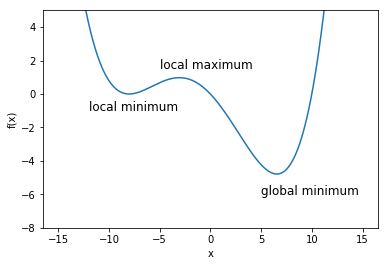

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-15, 15, 1000)
f = lambda z: (z**4 + 6*z**3 - 96*z**2 - 640*z)/1000
plt.plot(x, f(x));  plt.ylim(-8, 5); plt.xlabel('x'); plt.ylabel('f(x)')
plt.text(-12, -1, 'local minimum', fontsize=12)
plt.text(-5, 1.5, 'local maximum', fontsize=12)
plt.text(5, -6, 'global minimum', fontsize=12)
plt.show()

In [39]:
# Option 1 - Newton's method for f'(x) = 0
fp = lambda z: (4*z**3 + 18*z**2 - 192*z - 640)/1000.
fpp = lambda z: (12*z**2 + 36*z - 192)/1000.
# Set the initial guess
x = 5.0
# Perform Newton's method


print('minimum: f({:.2f}) is {:2f}'.format(x, f(x)))

minimum: f(5.00) is -4.225000


In [40]:
#  Option 2 - scipy's minimize
from scipy.optimize import minimize

print('minimum: f({:.2f}) is {:2f}'.format(x, f(x)))

minimum: f(5.00) is -4.225000


Note we needed the *second derivative* of the objective function $f(x)$.  For multi-dimensional problems, compare the following:

$$
\begin{split}
  f(x) &\longrightarrow f(\mathbf{x})\\
  \frac{df}{dx} &\longrightarrow \mathbf{g}(\mathbf{x}) = \left[ \begin{array}{c} 
   \partial f/\partial x_0 \\ 
   \partial f/\partial x_1 \\
   \vdots \\
   \partial f/\partial x_{n-1} 
   \end{array} \right] = \nabla f(\mathbf{x}) \qquad \text{the gradient vector}  \\
  \frac{d^2f}{dx^2} &\longrightarrow \mathbf{H}(\mathbf{x}) 
       = \begin{bmatrix}
    \frac{\partial g_0}{\partial x_0} & \frac{\partial g_0}{\partial x_1} & \ldots & \frac{\partial g_{0}}{\partial x_{n-1}} \\
    \frac{\partial g_1}{\partial x_0} & \frac{\partial g_1}{\partial x_0} & \ldots & \frac{\partial g_{1}}{\partial x_{n-1}} \\
         &     &  \ddots &  \\
    \frac{\partial g_{n-1}}{\partial x_{n-1}} & \frac{\partial g_{n-1}}{\partial x_{n-1}} & \ldots & \frac{\partial g_{n-1}}{\partial x_{n-1}} 
\end{bmatrix}  \qquad \text{the Hessian matrix} 
\end{split}
$$

Newton applied with $\mathbf{g}(\mathbf{x})$ in place of the residual and $\mathbf{H}(\mathbf{x})$ in place of the Jacobian---otherwise, identical!

## Constrained Optimization

Real engineering problems almost always have constraints: maximum stresses allowed, limited resources, etc.  

We'll limit our focus (and your responsibility) to *linear programs*, though do note that `scipy.optimize.minimize` can handle constrained problems (see its examples in the documentation).

**Example**: Consider the following minimization problem:

$$
\begin{split}
  \min_{\mathbf{x}} &= x_0 + 2 x_1 \\
   \text{subject to:} & \\
   x_0  & \geq 0 \\
   x_1  & \geq 0 \\
   x_0 - x_1  & \leq 2 \\
   5 x_0 - x_1 & = 1 
\end{split}
$$

Solve using `linprog`

In [16]:
from scipy.optimize import linprog
import numpy as np


**Example**:    Consider a pet food company that makes two products with inputs summarize as follows:

|   | Meaties  | Yummies  |
|---|---|---|
| Sales prices per package  | \$2.80  | \$2.00  |
| Raw materials per package  |   |   |
|  cereal  | 2 lb  |  3 lb |
|  meat     | 3 lb  |  1.5 lb |
| Variable cost-blending and packaging | \$0.25/package | \$0.20/package |

| Resources |   |
|-----------|---|
| maximum Meaties production/month   | 90,000 |
| cereal/month | 400,000 lb |
|    cost    | \$0.20/lb |
| meat/month | 300,000 lb |
|   cost     | \$0.50/lb |

How should the company allocate its resources each month?

(From http://www.uky.edu/~dsianita/300/online/LP.pdf).

## Recap


By the end of this lesson, you should be able to

- Define objective functions and constraints provided sufficient inputs
- Define examples of linear/nonlinear, constrained/unconstrained optimization problems
- Use `scipy.optimize.minimize` and `scipy.optimize.linprog` to solve a variety of optimization problems of interest